In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define vocabulary and their embeddings in 2D space
vocab = ["executive", "woman", "man", "doctor", "secretary", "nurse"]
embeddings = np.array([
    [0.9, 0.2],  # executive
    [0.2, 0.3],  # woman
    [0.85, 0.15],# man
    [0.8, 0.1],  # doctor
    [0.3, 0.35], # secretary
    [0.1, 0.2],  # nurse
])

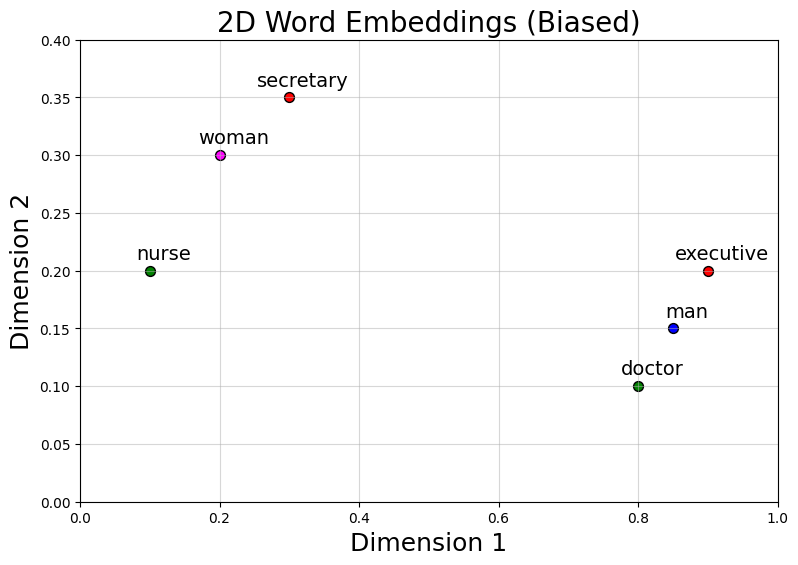

In [3]:
color_list = ["red", "magenta", "blue" , "green", "red", "green"]

plt.figure(figsize=(9, 6))
for idx, (x, y) in enumerate(embeddings):
    plt.scatter(x, y, color=color_list[idx], alpha=1.0, edgecolor='k', s=50)

# Add text annotations
for i, word in enumerate(vocab):
    plt.text(embeddings[i, 0] + 0.02, embeddings[i, 1] + 0.01, word, fontsize=14, ha='center', color="black")

# Set plot limits and labels
plt.title("2D Word Embeddings (Biased)", fontsize=20)
plt.xlabel("Dimension 1", fontsize=18)
plt.ylabel("Dimension 2", fontsize=18)
plt.xlim([0, 1])
plt.ylim([0, 0.4])
plt.grid(alpha=0.5)
# plt.savefig('biased word embeddings.png', dpi=300)
plt.show()

In [4]:
def find_projection(projected_vector, ref_vector):
    v_proj = ( np.dot(projected_vector, ref_vector) / np.linalg.norm(ref_vector) ** 2) * ref_vector
    return v_proj

In [5]:
gendered_word_pair = ['man', 'woman']

In [6]:
# Neutralizing
v_gender = embeddings[2] - embeddings[1]  # gender difference vector "man - woman"
embeddings_neutralized = []
for i in range(len(vocab)):
    if vocab[i] not in gendered_word_pair:
        v_proj = find_projection(embeddings[i], v_gender)
        embeddings_neutralized.append(embeddings[i] - v_proj)
    else:
        embeddings_neutralized.append(embeddings[i])
embeddings_neutralized = np.array(embeddings_neutralized)

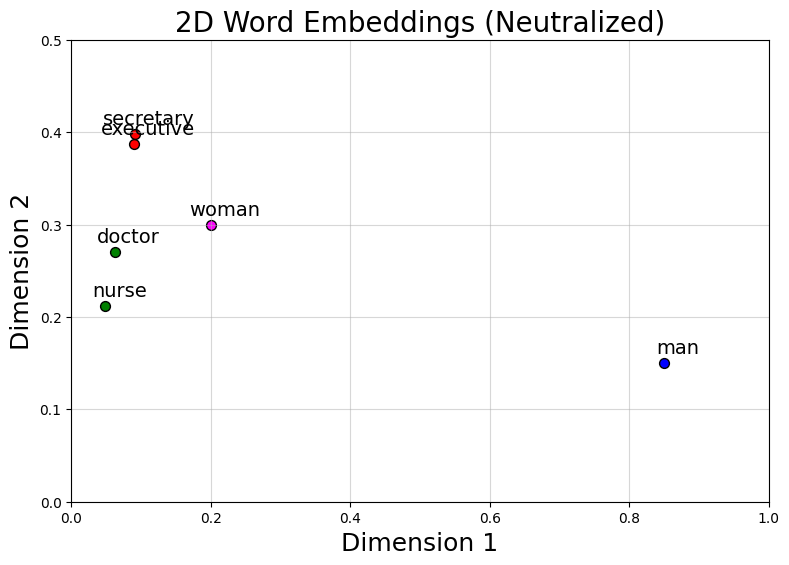

In [7]:
color_list = ["red", "magenta", "blue" , "green", "red", "green"]

plt.figure(figsize=(9, 6))
for idx, (x, y) in enumerate(embeddings_neutralized):
    plt.scatter(x, y, color=color_list[idx], alpha=1.0, edgecolor='k', s=50)

# Add text annotations
for i, word in enumerate(vocab):
    plt.text(embeddings_neutralized[i, 0] + 0.02, embeddings_neutralized[i, 1] + 0.01, word, fontsize=14, ha='center', color="black")

# Set plot limits and labels
plt.title("2D Word Embeddings (Neutralized)", fontsize=20)
plt.xlabel("Dimension 1", fontsize=18)
plt.ylabel("Dimension 2", fontsize=18)
plt.xlim([0, 1])
plt.ylim([0, 0.5])
plt.grid(alpha=0.5)
# plt.savefig('neutralized word embeddings.png', dpi=300)
plt.show()

In [8]:
# Equalization
man_proj = find_projection(embeddings[2], v_gender)
woman_proj = find_projection(embeddings[1], v_gender)
man_orthog = embeddings[2] - man_proj
woman_orthog = embeddings[1] - woman_proj
proj_mean = (man_proj + woman_proj)/2
embeddings_equalized = np.copy(embeddings_neutralized)
embeddings_equalized[2] = man_orthog + proj_mean
embeddings_equalized[1] = woman_orthog - proj_mean

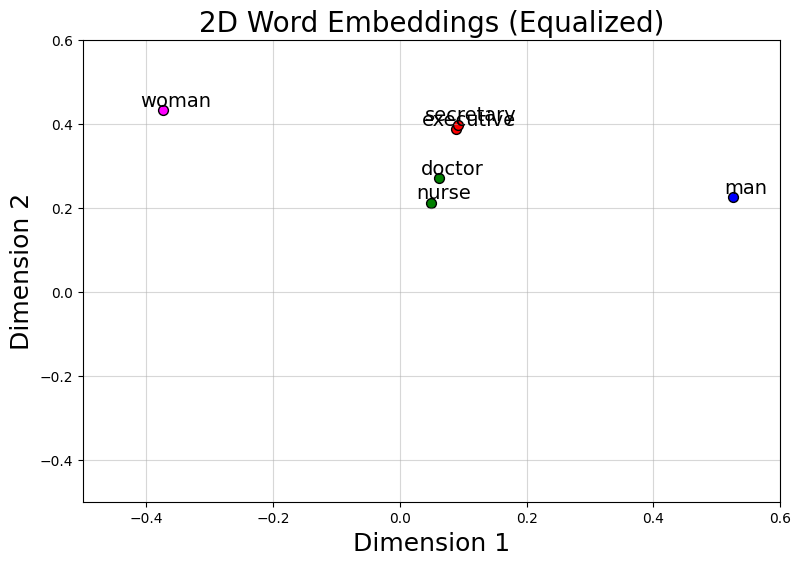

In [ ]:
color_list = ["red", "magenta", "blue" , "green", "red", "green"]

plt.figure(figsize=(9, 6))
for idx, (x, y) in enumerate(embeddings_equalized):
    plt.scatter(x, y, color=color_list[idx], alpha=1.0, edgecolor='k', s=50)

# Add text annotations
for i, word in enumerate(vocab):
    plt.text(embeddings_equalized[i, 0] + 0.02, embeddings_equalized[i, 1] + 0.01, word, fontsize=14, ha='center', color="black")

# Set plot limits and labels
plt.title("2D Word Embeddings (Equalized)", fontsize=20)
plt.xlabel("Dimension 1", fontsize=18)
plt.ylabel("Dimension 2", fontsize=18)
plt.xlim([-0.5, 0.6])
plt.ylim([-0.5, 0.6])
plt.grid(alpha=0.5)
# plt.savefig('equalized word embeddings.png', dpi=300)
plt.show()